# Sentinel S3A image library

Data cached in: `/gws/nopw/j04/cloudcatcher/AI_test`

In [2]:
import glob
import os

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image

In [37]:
cachedir = "/gws/nopw/j04/cloudcatcher/AI_test"

In [9]:
N = 16
s = 80
images = glob.glob(f"{cachedir}/*.png")[s:s+N]

In [10]:
images

['/gws/nopw/j04/cloudcatcher/AI_test/20230601T035836temp_image.png',
 '/gws/nopw/j04/cloudcatcher/AI_test/20230601T040035temp_image.png',
 '/gws/nopw/j04/cloudcatcher/AI_test/20230601T040335temp_image.png',
 '/gws/nopw/j04/cloudcatcher/AI_test/20230601T040635temp_image.png',
 '/gws/nopw/j04/cloudcatcher/AI_test/20230601T040935temp_image.png',
 '/gws/nopw/j04/cloudcatcher/AI_test/20230601T041235temp_image.png',
 '/gws/nopw/j04/cloudcatcher/AI_test/20230601T041535temp_image.png',
 '/gws/nopw/j04/cloudcatcher/AI_test/20230601T041835temp_image.png',
 '/gws/nopw/j04/cloudcatcher/AI_test/20230601T042135temp_image.png',
 '/gws/nopw/j04/cloudcatcher/AI_test/20230601T042435temp_image.png',
 '/gws/nopw/j04/cloudcatcher/AI_test/20230601T042735temp_image.png',
 '/gws/nopw/j04/cloudcatcher/AI_test/20230601T043035temp_image.png',
 '/gws/nopw/j04/cloudcatcher/AI_test/20230601T043335temp_image.png',
 '/gws/nopw/j04/cloudcatcher/AI_test/20230601T043635temp_image.png',
 '/gws/nopw/j04/cloudcatcher/AI_te

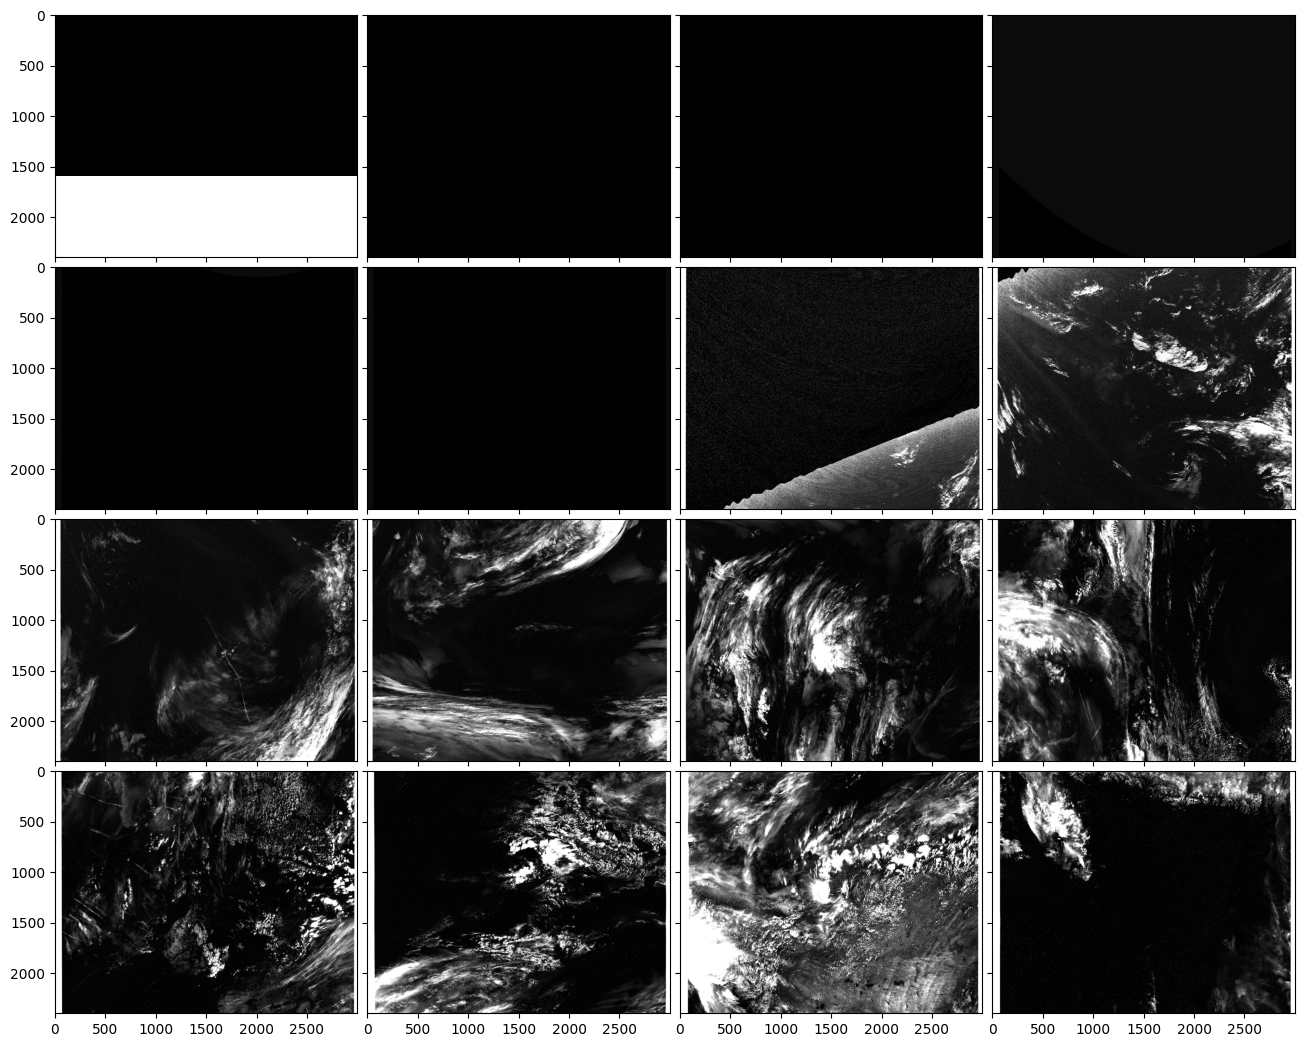

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axes_grid1 import ImageGrid


fig = plt.figure(figsize=(N, N))
nx = round(N**0.5)
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(nx, nx),  # creates 2x2 grid of Axes
                 axes_pad=0.1,  # pad between Axes in inch.
                 )

for ax, im in zip(grid, images):
    # Iterating over the grid returns the Axes.
    ax.imshow(Image.open(im))

plt.show()

In [44]:
!ls ../

LICENSE    _config.yml	dataset  requirements.txt
README.md  checkpoints	images	 src


Shape (500, 500, 3) (321, 481, 3)


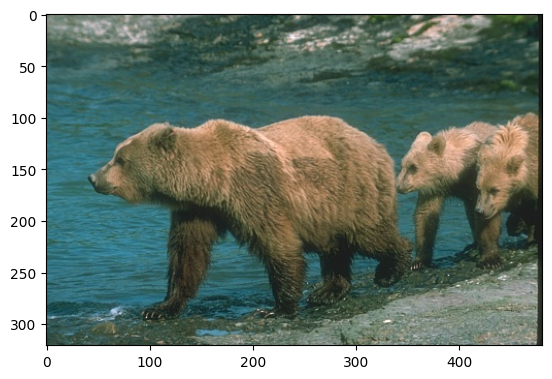

In [47]:
im = Image.open("../dataset/BSDS300/images/train/100075.jpg")
import numpy as np
imcrop = im.crop([0, 0, 500, 500])
x = np.array(imcrop)
print("Shape", x.shape, np.array(im).shape)
x = x[:,:,0]
plt.imshow(im)

Shape (500, 500, 4) (2400, 3000, 4)


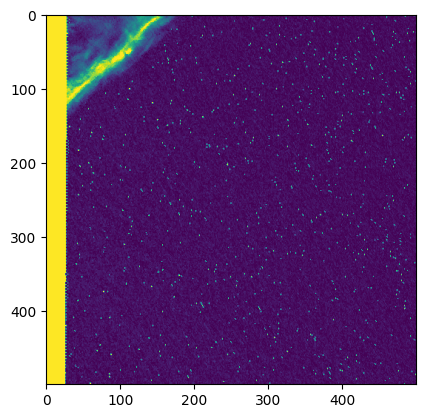

In [12]:
im = Image.open("/gws/nopw/j04/cloudcatcher/AI_test/20230601T000037temp_image.png")
import numpy as np
imcrop = im.crop([0, 0, 500, 500])
x = np.array(imcrop)
print("Shape", x.shape, np.array(im).shape)
x = x[:,:,0]
plt.imshow(x)

**NOTE: Speckles are negative values of radiance, the plotting routine has clipped these.**

In [39]:
def slice_image(ipath, outdir="train", xslices=5, yslices=5):
    # Open image and split channels, just take the first
    if not os.path.isdir(outdir):
        os.makedirs(outdir)

    iname_base = os.path.basename(ipath)[:-4]
    im = Image.open(ipath).split()[0]
    width, height = im.width, im.height
    slicewidth, sliceheight = round(width / xslices), round(height / yslices)
    ipaths = []

    min_x = 0
    x = 1
    while min_x < width:
        min_y = 0
        y = 1
        max_x = min_x + slicewidth

        while min_y < height:
            max_y = min_y + sliceheight
            subimage = im.crop([min_x, min_y, max_x, max_y])
            outpath = f"{outdir}/{iname_base}_x{x}y{y}.png"
            print(f"Saving image: {outpath}")
            subimage.save(outpath)
            ipaths.append(outpath)
            min_y = max_y
            y += 1

        min_x = max_x
        x += 1

    # Sort the images so they come in best order (along each row in turn)
    ipaths = [i2[::-1] for i2 in sorted([i1[::-1] for i1 in ipaths])]
    return ipaths

#os.mkdir("train")
images = slice_image("/gws/nopw/j04/cloudcatcher/AI_test/20230601T043935temp_image.png",
                    outdir=f"{cachedir}/ag_tmp/train")

Saving image: /gws/nopw/j04/cloudcatcher/AI_test/ag_tmp/train/20230601T043935temp_image_x1y1.png
Saving image: /gws/nopw/j04/cloudcatcher/AI_test/ag_tmp/train/20230601T043935temp_image_x1y2.png
Saving image: /gws/nopw/j04/cloudcatcher/AI_test/ag_tmp/train/20230601T043935temp_image_x1y3.png
Saving image: /gws/nopw/j04/cloudcatcher/AI_test/ag_tmp/train/20230601T043935temp_image_x1y4.png
Saving image: /gws/nopw/j04/cloudcatcher/AI_test/ag_tmp/train/20230601T043935temp_image_x1y5.png
Saving image: /gws/nopw/j04/cloudcatcher/AI_test/ag_tmp/train/20230601T043935temp_image_x2y1.png
Saving image: /gws/nopw/j04/cloudcatcher/AI_test/ag_tmp/train/20230601T043935temp_image_x2y2.png
Saving image: /gws/nopw/j04/cloudcatcher/AI_test/ag_tmp/train/20230601T043935temp_image_x2y3.png
Saving image: /gws/nopw/j04/cloudcatcher/AI_test/ag_tmp/train/20230601T043935temp_image_x2y4.png
Saving image: /gws/nopw/j04/cloudcatcher/AI_test/ag_tmp/train/20230601T043935temp_image_x2y5.png
Saving image: /gws/nopw/j04/cl

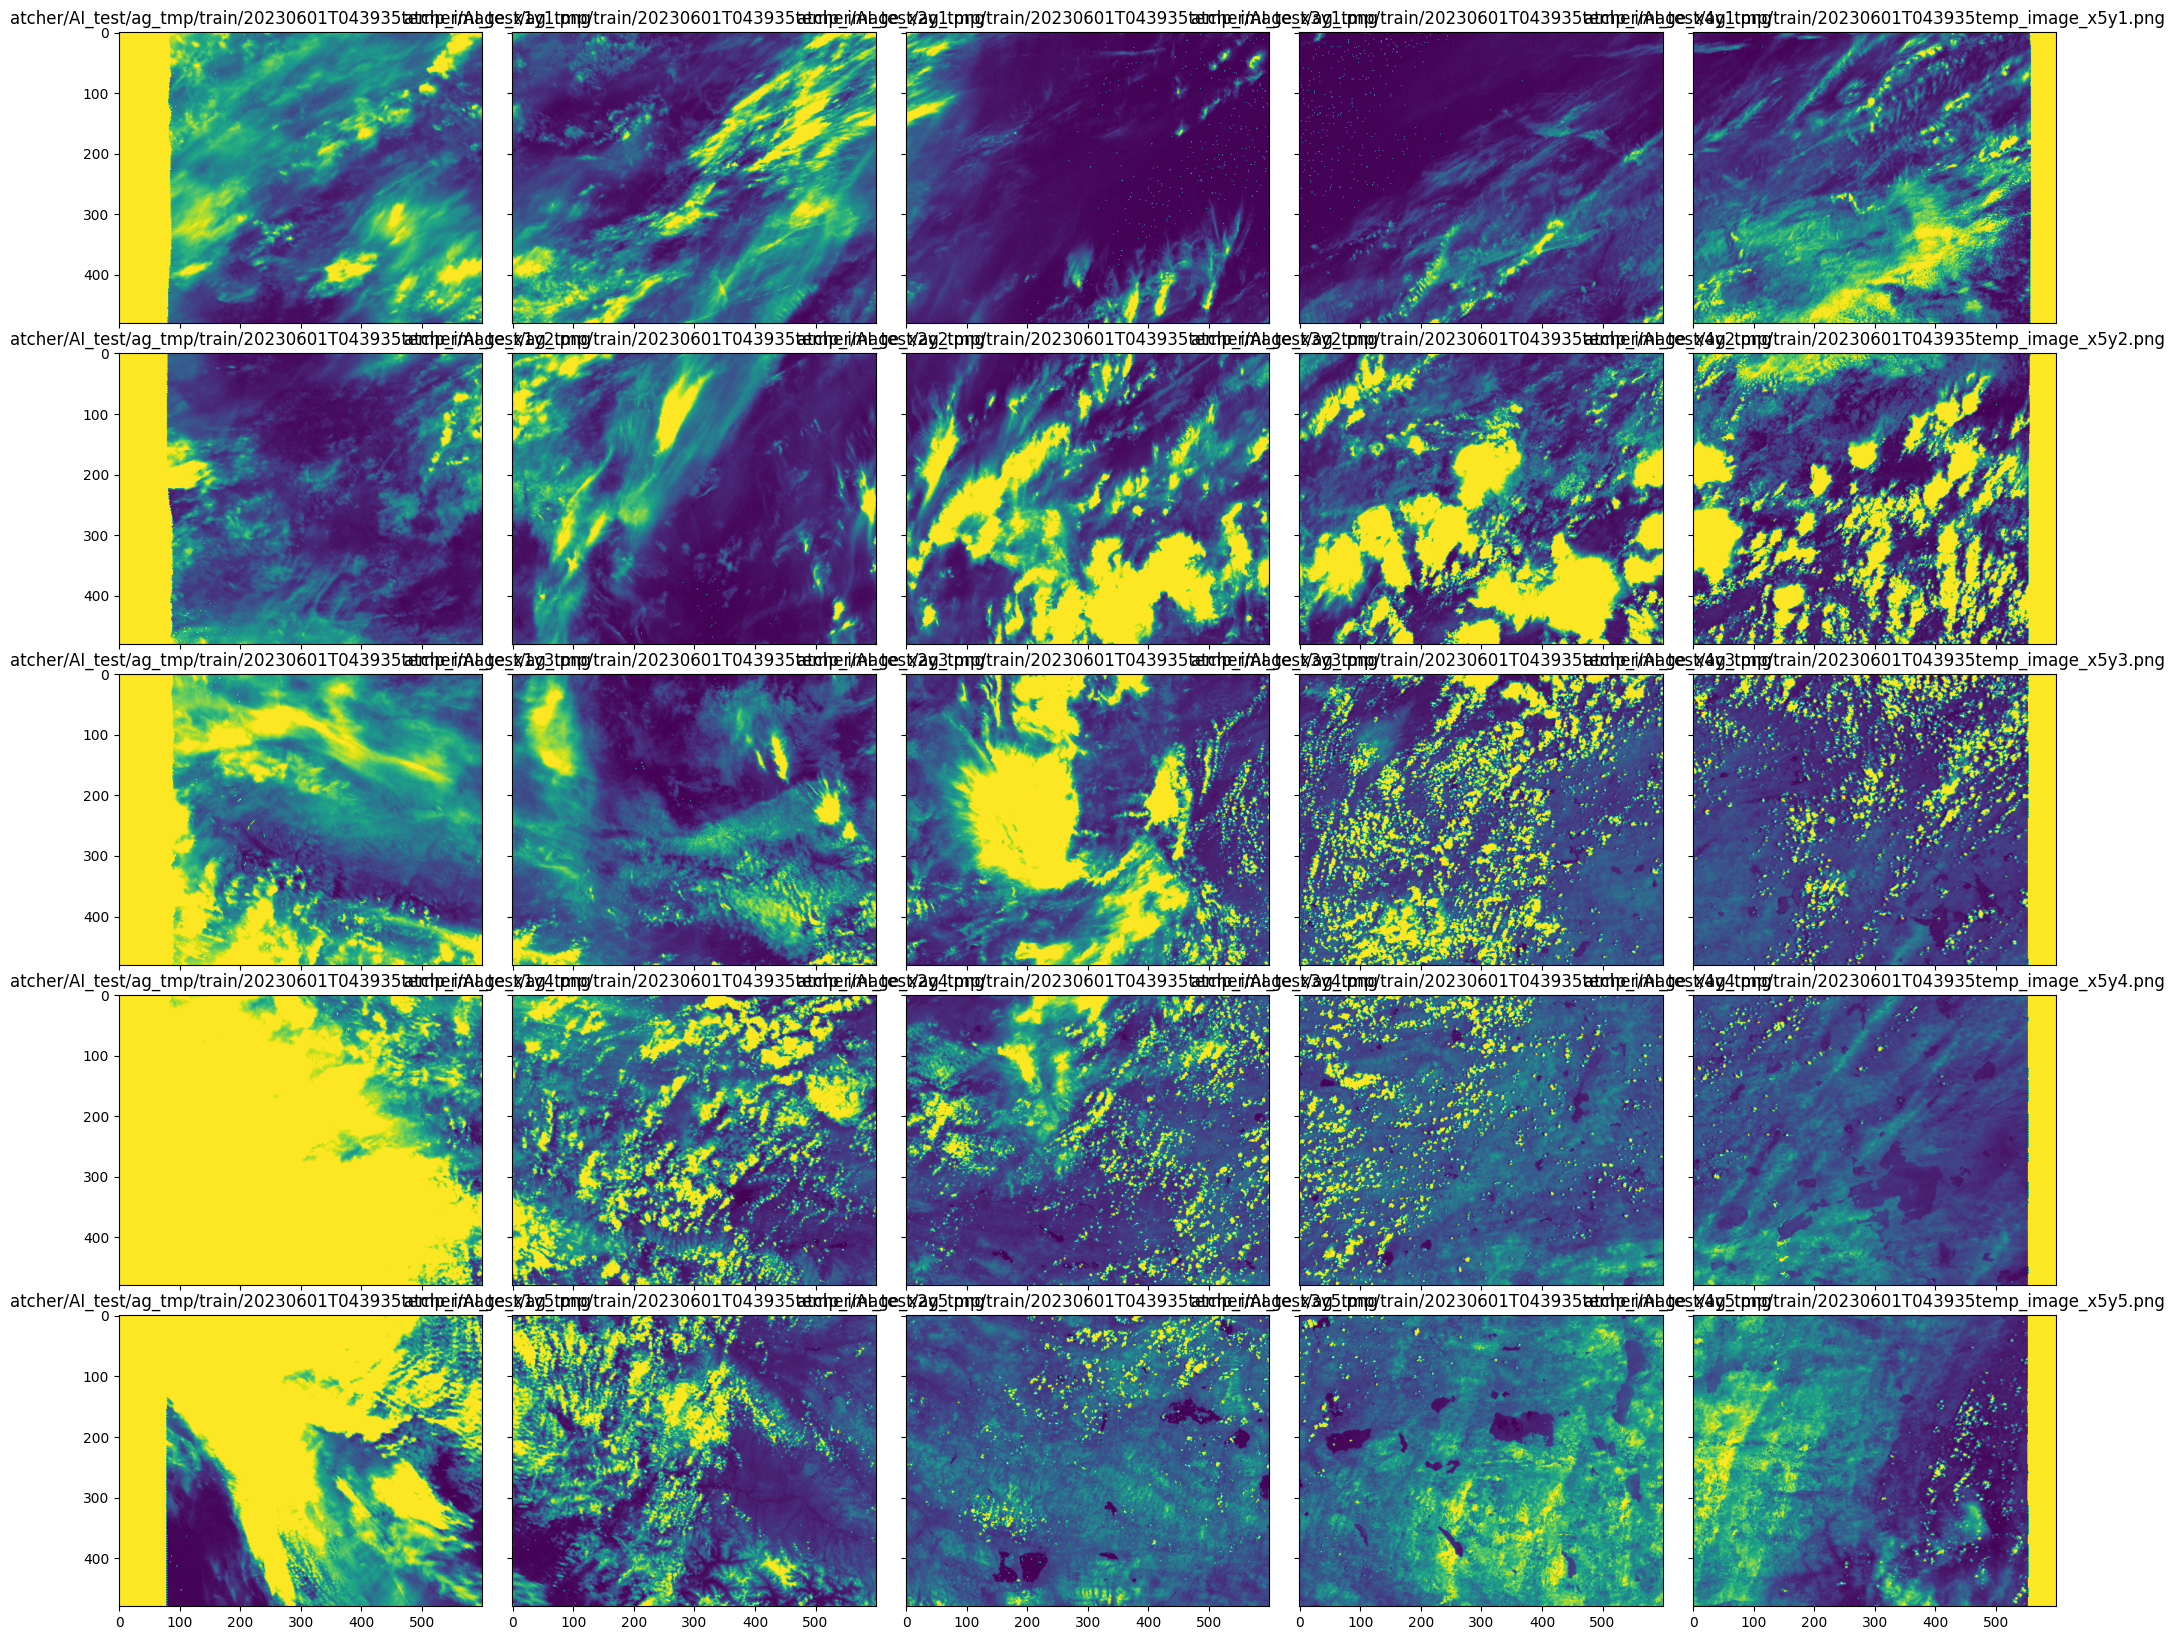

In [40]:
N = 25
fig = plt.figure(figsize=(N, N))
nx = round(N**0.5)
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(nx, nx),  # creates 2x2 grid of Axes
                 axes_pad=0.3,  # pad between Axes in inch.
                 )

for ax, im in zip(grid, images):
    # Iterating over the grid returns the Axes.
    ax.imshow(Image.open(im))
    ax.set_title(im[20:])

plt.show()

In [36]:
Image.open(im).split()



(<PIL.Image.Image image mode=L size=600x480>,)

In [31]:
[i2[::-1] for i2 in sorted([i1[::-1] for i1 in images])]

['train/20230601T043935temp_image_x1y1.png',
 'train/20230601T043935temp_image_x2y1.png',
 'train/20230601T043935temp_image_x3y1.png',
 'train/20230601T043935temp_image_x4y1.png',
 'train/20230601T043935temp_image_x5y1.png',
 'train/20230601T043935temp_image_x1y2.png',
 'train/20230601T043935temp_image_x2y2.png',
 'train/20230601T043935temp_image_x3y2.png',
 'train/20230601T043935temp_image_x4y2.png',
 'train/20230601T043935temp_image_x5y2.png',
 'train/20230601T043935temp_image_x1y3.png',
 'train/20230601T043935temp_image_x2y3.png',
 'train/20230601T043935temp_image_x3y3.png',
 'train/20230601T043935temp_image_x4y3.png',
 'train/20230601T043935temp_image_x5y3.png',
 'train/20230601T043935temp_image_x1y4.png',
 'train/20230601T043935temp_image_x2y4.png',
 'train/20230601T043935temp_image_x3y4.png',
 'train/20230601T043935temp_image_x4y4.png',
 'train/20230601T043935temp_image_x5y4.png',
 'train/20230601T043935temp_image_x1y5.png',
 'train/20230601T043935temp_image_x2y5.png',
 'train/20